# Soft Drinks Sales Market Analysis and Prediction

### Importing all Dependencies

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score
from sklearn import metrics

### Data Preprocessing

In [42]:
# loading dataset
sd_sales_dataset = pd.read_csv("data/soft_drinks_sales_v6.csv")

In [43]:
# showing dataset start
sd_sales_dataset.head()

,Date,Sell_per_Day_Liters,Temperature_Celsius
0,2018-01-01,124.67,32.93
1,2018-01-02,127.86,36.08
2,2018-01-03,113.28,32.88
3,2018-01-04,158.98,41.76
4,2018-01-05,157.63,39.79


In [44]:
# showing dataset end
sd_sales_dataset.tail()

,Date,Sell_per_Day_Liters,Temperature_Celsius
1821,2022-12-27,133.98,35.84
1822,2022-12-28,129.84,35.47
1823,2022-12-29,100.00,29.54
1824,2022-12-30,100.00,29.35
1825,2022-12-31,111.83,29.28


In [45]:
# dataset size
sd_sales_dataset.shape

(1826, 3)

In [46]:
# showing information
sd_sales_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 1826 non-null   object 
 1   Sell_per_Day_Liters  1826 non-null   float64
 2   Temperature_Celsius  1826 non-null   float64
dtypes: float64(2), object(1)
memory usage: 42.9+ KB


In [47]:
# checking nulls
sd_sales_dataset.isnull().sum()

Date                   0
Sell_per_Day_Liters    0
Temperature_Celsius    0
dtype: int64

In [48]:
# cheking teparature throughout datset
sd_sales_dataset["Temperature_Celsius"].value_counts()

31.98    7
34.79    6
38.88    6
34.49    6
28.53    6
        ..
40.11    1
32.28    1
31.57    1
31.24    1
29.35    1
Name: Temperature_Celsius, Length: 1044, dtype: int64

In [49]:
# statistical measures of dataset
sd_sales_dataset.describe()

,Sell_per_Day_Liters,Temperature_Celsius
count,1826.000000,1826.000000
mean,129.615827,34.934414
std,19.750301,3.982510
min,100.000000,28.000000
25%,112.212500,31.510000
50%,128.720000,34.790000
75%,147.212500,38.387500
max,169.820000,42.000000


In [50]:
# correlation 
correlation = sd_sales_dataset.corr()
correlation

,Sell_per_Day_Liters,Temperature_Celsius
Sell_per_Day_Liters,1.000000,0.880068
Temperature_Celsius,0.880068,1.000000


<Axes: >

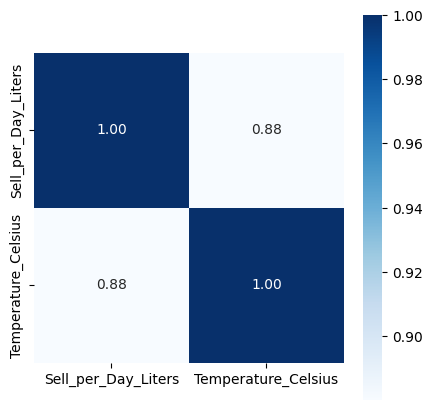

In [51]:
# plot correlation matrix
plt.figure(figsize = (5, 5))
sns.heatmap(correlation, cbar = True, square = True, fmt = ".2f", annot = True, annot_kws = {"size": 10}, cmap = "Blues")

### Saperating Feature and Target

In [52]:
X = sd_sales_dataset.drop(["Date", "Sell_per_Day_Liters"], axis = 1)
Y = sd_sales_dataset["Sell_per_Day_Liters"]

### Split Train and Test data

In [53]:
# split dataset into 70/30 train/test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 2)

In [54]:
# train and test data shape
print("X_Train Data Shape: ", X_train.shape)
print("Y_Train Data Shape: ", Y_train.shape)
print("X_Test Data Shape: ", X_test.shape)
print("Y_Test Data Shape: ", Y_test.shape)

X_Train Data Shape:  (1278, 1)
Y_Train Data Shape:  (1278,)
X_Test Data Shape:  (548, 1)
Y_Test Data Shape:  (548,)


### Model Training using Linear Regression

In [55]:
model = LinearRegression()

In [56]:
model.fit(X_train, Y_train)

LinearRegression()

### Model Evaluation

In [57]:
# prediction on train data
train_data_prediciton = model.predict(X_train)

# MSE loss
train_error_score_mse = metrics.mean_squared_error(train_data_prediciton, Y_train)

# R squraed score
train_score_r2 = metrics.r2_score(train_data_prediciton, Y_train)

print("Train Data")
print("Mean Squared Error: ", train_error_score_mse)
print("R2 Score: ", train_score_r2)

Train Data
Mean Squared Error:  88.96893225215368
R2 Score:  0.7039642454002043


In [58]:
# prediction on test data
test_data_prediciton = model.predict(X_test)

# MSE loss
test_error_score_mse = metrics.mean_squared_error(test_data_prediciton, Y_test)

# R squraed score
test_score_r2 = metrics.r2_score(test_data_prediciton, Y_test)

print("Test Data")
print("Mean Squared Error: ", test_error_score_mse)
print("R2 error: ", test_score_r2)

Test Data
Mean Squared Error:  85.45335662696989
R2 error:  0.7248556747419069


In [59]:
LR = test_score_r2

### Plots 

In [60]:
m, b = np.polyfit(Y_train, train_data_prediciton, 1)

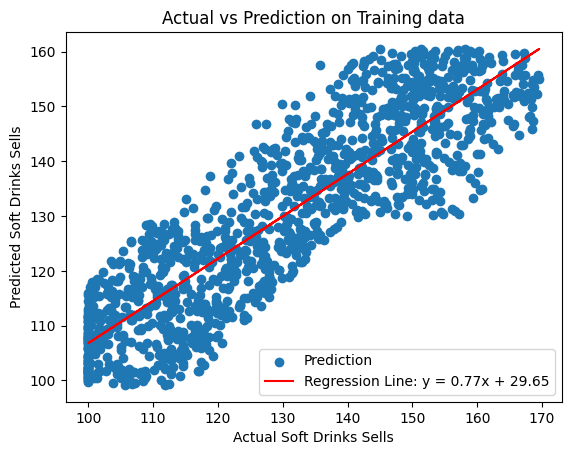

In [61]:
# training data plot
plt.scatter(Y_train, train_data_prediciton)
plt.xlabel("Actual Soft Drinks Sells")
plt.ylabel("Predicted Soft Drinks Sells")
plt.title("Actual vs Prediction on Training data")
plt.plot(Y_train, m*Y_train + b, color = "red")
plt.legend(["Prediction", 'Regression Line: y = {:.2f}x + {:.2f}'.format(m, b)])
plt.show()

In [62]:
m, b = np.polyfit(Y_test, test_data_prediciton, 1)

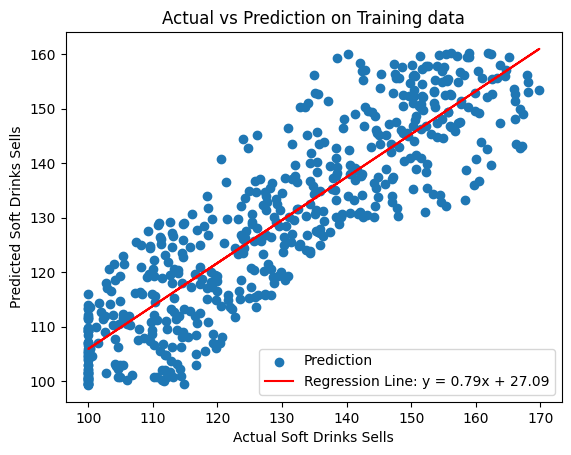

In [63]:
# test data plot
plt.scatter(Y_test, test_data_prediciton)
plt.xlabel("Actual Soft Drinks Sells")
plt.ylabel("Predicted Soft Drinks Sells")
plt.title("Actual vs Prediction on Training data")
plt.plot(Y_test, m*Y_test + b, color = "red")
plt.legend(["Prediction", 'Regression Line: y = {:.2f}x + {:.2f}'.format(m, b)])
plt.show()

### Overlap Plot

In [64]:
Y_test_list = list(Y_test)

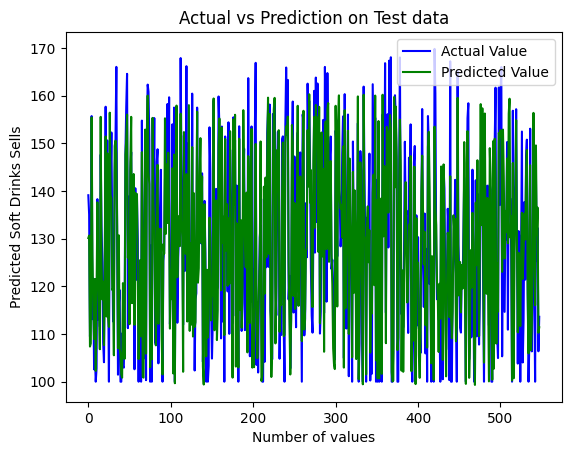

In [65]:
# more green better prediction
plt.plot(Y_test_list, color = "blue", label = "Actual Value")
plt.plot(test_data_prediciton, color = "green", label = "Predicted Value")
plt.title("Actual vs Prediction on Test data")
plt.xlabel("Number of values")
plt.ylabel("Predicted Soft Drinks Sells")
plt.legend()
plt.show()

### Model Training using XGBoost Regressor

In [66]:
model = XGBRegressor() 

In [67]:
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

### Model Evaluation

In [68]:
# prediction on train data
train_data_prediciton = model.predict(X_train)

# MSE loss
train_error_score_mse = metrics.mean_squared_error(train_data_prediciton, Y_train)

# R squraed score
train_score_r2 = metrics.r2_score(train_data_prediciton, Y_train)

print("Train Data")
print("Mean Squared Error: ", train_error_score_mse)
print("R2 Score: ", train_score_r2)

Train Data
Mean Squared Error:  40.71609509782873
R2 Score:  0.8765068289299479


In [69]:
# prediction on test data
test_data_prediciton = model.predict(X_test)

# MSE loss
test_error_score_mse = metrics.mean_squared_error(test_data_prediciton, Y_test)

# R squraed error
test_score_r2 = metrics.r2_score(test_data_prediciton, Y_test)

print("Test Data")
print("Mean Squared Error: ", test_error_score_mse)
print("R2 error: ", test_score_r2)

Test Data
Mean Squared Error:  92.49934661987835
R2 error:  0.7140783734084896


In [70]:
XGB = test_score_r2

### Plots 

In [71]:
m, b = np.polyfit(Y_train, train_data_prediciton, 1)

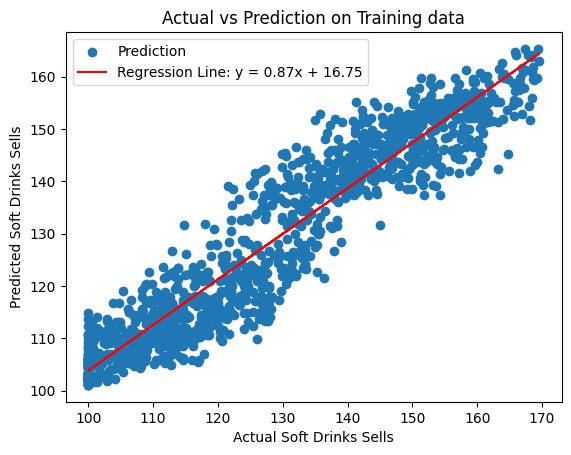

In [72]:
# training data plot
plt.scatter(Y_train, train_data_prediciton)
plt.xlabel("Actual Soft Drinks Sells")
plt.ylabel("Predicted Soft Drinks Sells")
plt.title("Actual vs Prediction on Training data")
plt.plot(Y_train, m*Y_train + b, color = "red")
plt.legend(["Prediction", 'Regression Line: y = {:.2f}x + {:.2f}'.format(m, b)])
plt.show()

In [73]:
m, b = np.polyfit(Y_test, test_data_prediciton, 1)

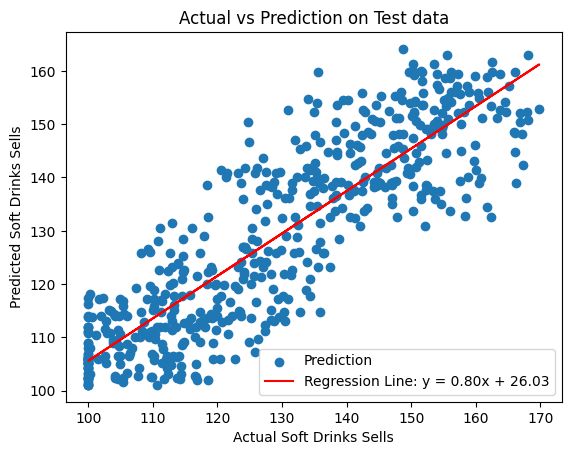

In [74]:
# test data plot
plt.scatter(Y_test, test_data_prediciton)
plt.xlabel("Actual Soft Drinks Sells")
plt.ylabel("Predicted Soft Drinks Sells")
plt.title("Actual vs Prediction on Test data")
plt.plot(Y_test, m*Y_test + b, color = "red")
plt.legend(["Prediction", 'Regression Line: y = {:.2f}x + {:.2f}'.format(m, b)])
plt.show()

### Overlap Plot

In [75]:
Y_test_list = list(Y_test)

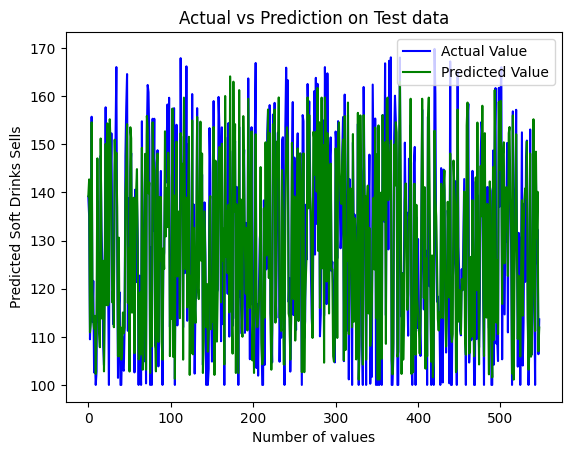

In [76]:
# more green better prediction
plt.plot(Y_test_list, color = "blue", label = "Actual Value")
plt.plot(test_data_prediciton, color = "green", label = "Predicted Value")
plt.title("Actual vs Prediction on Test data")
plt.xlabel("Number of values")
plt.ylabel("Predicted Soft Drinks Sells")
plt.legend()
plt.show()

### Performance of Models

Text(0.5, 1.0, 'Model Scores')

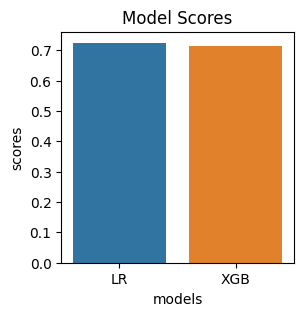

In [77]:
df_score = pd.DataFrame({"models":["LR", "XGB"], "scores": [LR, XGB]})
plt.figure(figsize = (3,3))
sns.barplot(data = df_score, x = "models", y = "scores")
plt.title("Model Scores")

### Pridictive System

In [78]:
test = (40)

In [79]:
# change input data to nympy array
test_arr = np.asarray(test)

# reshape the numpy array
test_reshaped = test_arr.reshape(1, -1)

prediction = model.predict(test_reshaped)

print("Temperature is {:.2f} C today, predicted soft drinks sell is: {:.2f} Liters.".format(test, prediction[0]))

Temperature is 40.00 C today, predicted soft drinks sell is: 163.71 Liters.
